In [49]:
#import bibliotek i zbioru danych
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('steam_games.csv')

In [50]:
#1. 
print("Liczba wierszy i kolumn:", df.shape)
print("\nLiczba braków danych (NA):")
na = df.isna().sum()
print(na)
print("\nTypy zmiennych:")
print(df.dtypes)

Liczba wierszy i kolumn: (71429, 21)

Liczba braków danych (NA):
steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64

Typy zmiennych:
steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
total_re

- Nasz zbiór danych dotyczy gier komputerowych na platformie Steam.
- Jak widzimy po wywołaniu powyższego kodu zawiera on 71429 wierszy (gier) oraz 21 kolumn.
- W danych nie ma wartości NA, za to występuje bardzo wiele zer.
- Powyżej po wywołaniu kodu opisane są typy zmiennych występujących w zbiorze, gdzie:
  int64 to liczba całkowita, float64 - zmiennoprzecinkowa, bool - wartość TRUE/FALSE oraz object - lista elementów.

In [51]:
#2.
print("\nWybrane statystyki dla zmiennych numerycznych (bez zer):")

#usuwamy kolumnę 'steam_appid', bo bez sensu liczyćstatystyki od id gry
df2 = df.drop(columns=['steam_appid'])
#wybieramy tylko kolumny numeryczne
numeric_cols = df2.select_dtypes(include=[np.number]).columns
#POMIJAMY ZERA inaczej statystyki są kompletnie nieprawdziwe
for col in numeric_cols:
    col_data = df2[col]
    col_data = col_data[(~col_data.isna()) & (col_data != 0)]
    if len(col_data) > 0:
        print(f"\nKolumna: {col}")
        print(f"  Średnia: {np.mean(col_data):.2f}")
        print(f"  Mediana: {np.median(col_data):.2f}")
        print(f"  Odchylenie standardowe: {np.std(col_data):.2f}")
        print(f"  Wariancja: {np.var(col_data):.2f}")
        print(f"  Minimum: {np.min(col_data):.2f}")
        print(f"  Maksimum: {np.max(col_data):.2f}")
    else:
        print(f"\nKolumna: {col} – brak wartości różnych od 0 i NaN")


Wybrane statystyki dla zmiennych numerycznych (bez zer):

Kolumna: required_age
  Średnia: 72.85
  Mediana: 75.00
  Odchylenie standardowe: 10.51
  Wariancja: 110.39
  Minimum: 23.00
  Maksimum: 97.00

Kolumna: n_achievements
  Średnia: 36.42
  Mediana: 19.00
  Odchylenie standardowe: 206.03
  Wariancja: 42449.87
  Minimum: 1.00
  Maksimum: 9821.00

Kolumna: total_reviews
  Średnia: 656.78
  Mediana: 11.00
  Odchylenie standardowe: 10607.92
  Wariancja: 112528027.63
  Minimum: 1.00
  Maksimum: 1279700.00

Kolumna: total_positive
  Średnia: 614.58
  Mediana: 10.00
  Odchylenie standardowe: 9670.18
  Wariancja: 93512409.22
  Minimum: 1.00
  Maksimum: 1107275.00

Kolumna: total_negative
  Średnia: 105.80
  Mediana: 5.00
  Odchylenie standardowe: 1701.31
  Wariancja: 2894470.48
  Minimum: 1.00
  Maksimum: 172425.00

Kolumna: review_score
  Średnia: 6.53
  Mediana: 7.00
  Odchylenie standardowe: 1.30
  Wariancja: 1.70
  Minimum: 1.00
  Maksimum: 9.00

Kolumna: positive_percentual
  Średnia

- Wymagany wiek do grania w daną gre jest niestety podejrzany, pewnie przez to, że większość źle uzupełniona.
- Średnio mamy ok. 36 osiągnieć na grę, ale też zdarzają się ogromni outlierzy, w dodatku mediana 19.
- W liczbie ocen gier są ogromne różnice, widzimy, że są one przeważnie pozytywne(78%), duża różnica min. i max..
- średnia ocen graczy to około 6.5 na 10.
- średnia na 100 od metacritic wynosi ok. 73.
- gry przeważnie ok. 6 dolarów amerykańskich, duża wariancja.

In [52]:
#3.
print("\nAnaliza wybranych zmiennych numerycznych według gatunków:")

#wybór interesujących kolumn
relevant_cols = ['genres', 'price_initial (USD)', 'review_score', 'metacritic']
df_genre = df[relevant_cols].dropna(subset=['genres'])
df_genre['genres'] = df_genre['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df_exploded = df_genre.explode('genres')
#pomijamy wiersze, gdzie price, user_score lub metacritic to 0 lub NaN
df_filtered = df_exploded[
    (df_exploded['price_initial (USD)'].notna()) & (df_exploded['price_initial (USD)'] != 0) &
    (df_exploded['review_score'].notna()) & (df_exploded['review_score'] != 0) &
    (df_exploded['metacritic'].notna()) & (df_exploded['metacritic'] != 0)]
#BIERZEMY GATUNKI Z MINIMUM !) REPREZENTANTAMI
genre_counts = df_filtered['genres'].value_counts()
valid_genres = genre_counts[genre_counts >= 10].index
df_valid = df_filtered[df_filtered['genres'].isin(valid_genres)]
grouped_genre_stats = df_valid.groupby('genres')[['price_initial (USD)', 'review_score', 'metacritic']].mean()
grouped_genre_stats_sorted = grouped_genre_stats.sort_values(by='review_score')
print(grouped_genre_stats_sorted)


Analiza wybranych zmiennych numerycznych według gatunków:
                       price_initial (USD)  review_score  metacritic
genres                                                              
Strategy                         19.388624      6.726510   72.798658
Sports                           18.990000      6.770492   72.229508
Racing                           16.240000      6.787879   69.757576
Simulation                       19.444934      6.835544   71.445623
Adventure                        17.477295      7.055507   73.361233
Action                           19.268603      7.064148   72.855009
Indie                            15.458109      7.074447   72.823608
Massively Multiplayer            23.865000      7.125000   74.875000
RPG                              21.251770      7.129944   74.370998
Casual                           14.127329      7.204748   73.261128


- widzimy, że gatunek gry nieznacznie wpływa na cenę, jednak gry multiplayer wyraźnie średnio droższe, a Indie/Casual tańsze.
- oceny graczy są podobne w okolicach  7/10
- oceny metacritic również podobne nieznacznie wyższe od graczy.

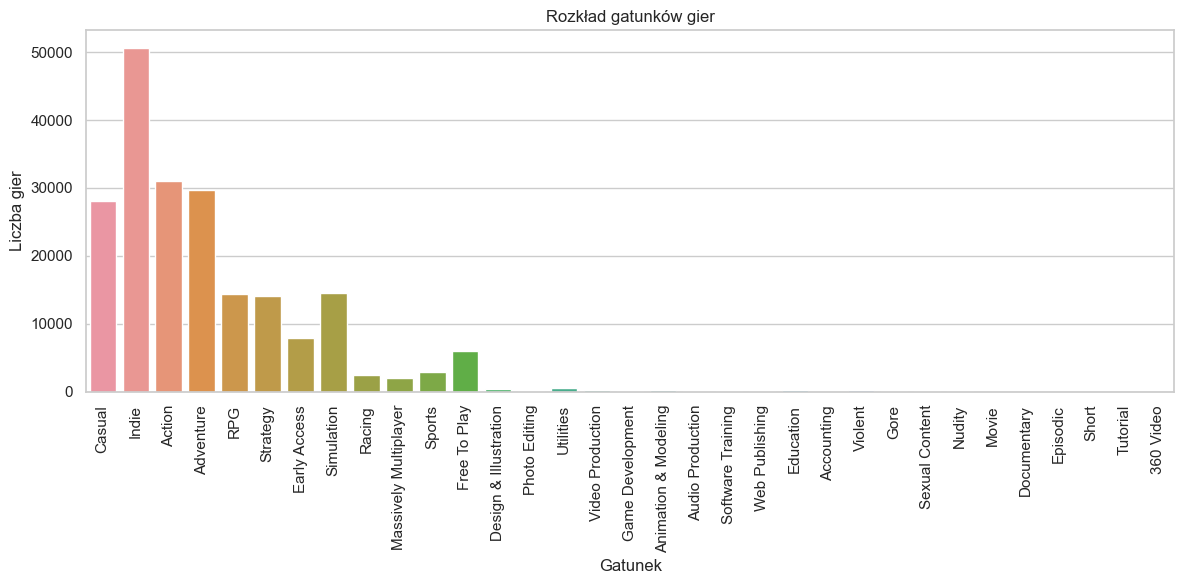

In [53]:
#4.
from collections import Counter

df_genres = df['genres'].dropna()
genres_list = df_genres.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
all_genres = [genre for sublist in genres_list for genre in sublist]
genre_counts = Counter(all_genres)
#wykres
plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=90)
plt.title('Rozkład gatunków gier')
plt.xlabel('Gatunek')
plt.ylabel('Liczba gier')
plt.tight_layout()
plt.show()

- Widzimy, że gry Indie cieszą się największą licznością, dużo też Casual, Action oraz Adventure.
- Jest bardzo wiele gatunków mający mało reprezentantów (aż nie widać nic na wykresie).
- Występuje 12 gatunków z ponad tysięczną licznością.

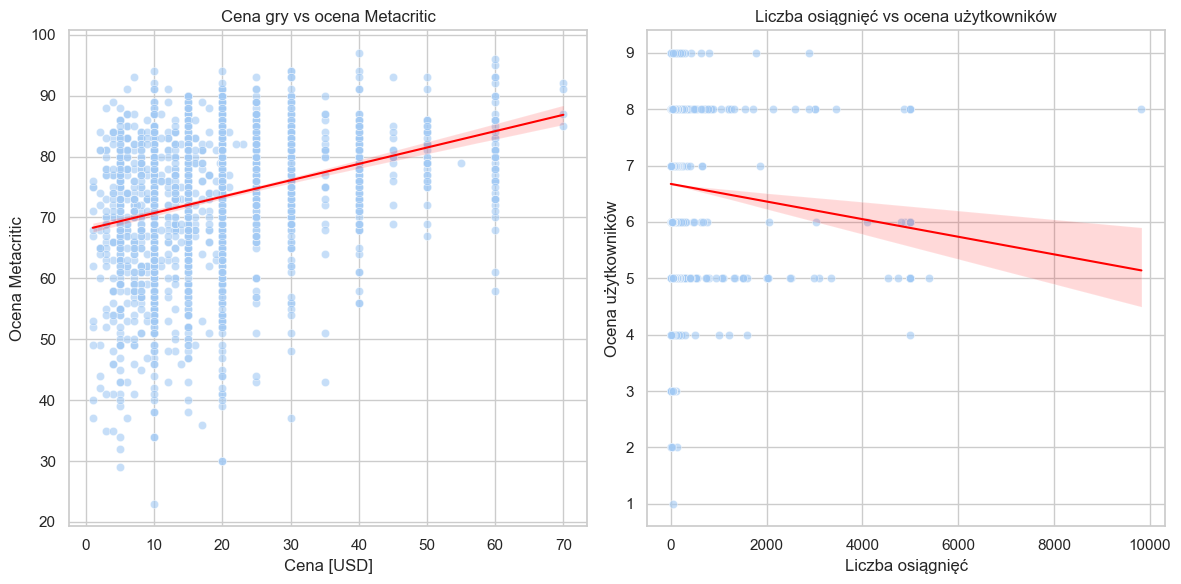

In [40]:
#5.
#POMINIEMY ZNOWU ZERA I NA

#styl wykresów
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))

#wykres 1: cena vs metacritic
df_plot1 = df[(df['price_initial (USD)'].notna()) & (df['metacritic'].notna()) & 
              (df['price_initial (USD)'] > 0) & (df['metacritic'] > 0)]
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_plot1, x='price_initial (USD)', y='metacritic', alpha=0.6)
sns.regplot(data=df_plot1, x='price_initial (USD)', y='metacritic', scatter=False, color='red', line_kws={'linewidth':1.5})
plt.title('Cena gry vs ocena Metacritic')
plt.xlabel('Cena [USD]')
plt.ylabel('Ocena Metacritic')
#wykres 2: n_achievements vs review_score
df_plot2 = df[(df['n_achievements'].notna()) & (df['review_score'].notna()) &
              (df['n_achievements'] > 0) & (df['review_score'] > 0)]
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_plot2, x='n_achievements', y='review_score', alpha=0.6)
sns.regplot(data=df_plot2, x='n_achievements', y='review_score', scatter=False, color='red', line_kws={'linewidth':1.5})
plt.title('Liczba osiągnięć vs ocena użytkowników')
plt.xlabel('Liczba osiągnięć')
plt.ylabel('Ocena użytkowników')
plt.tight_layout()
plt.show()

- z pierwszego wykresu wynika, że z reguły im gra jest droższa, tym lepszą ocenę od Metacritic otrzymuje.
- ponadto widzimy, że nie ma gier drogich oraz bardzo słabo ocenionych.
- z drugiego wykresu wynika, że duża liczba osiągnięćnie wpływa dobrze na ocenę gry przez użytkowników.
- warto zauważyć też, że nie ma gier z bardzo dużą ilością osiągnięći oceną poniżej 4.0